Let us use the most famous MNIST dataset for classification using Keras. Steps that we will follow are exactly the same that we have been doing so far.

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist_data = tf.keras.datasets.mnist

In [4]:
(training_images, training_labels), (testing_images, testing_labels) = mnist_data.load_data()

In [7]:
print('''Shape of training image - {}
Shape of training label - {}
Shape of testing image - {}
Shape of testing label - {}'''.format(training_images.shape, training_labels.shape, testing_images.shape, testing_labels.shape))

Shape of training image - (60000, 28, 28)
Shape of training label - (60000,)
Shape of testing image - (10000, 28, 28)
Shape of testing label - (10000,)


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136 244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253 238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 253 237 200  57 

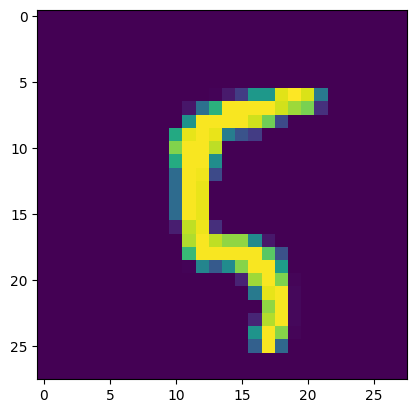

In [13]:
# Let's check the 100th row

np.set_printoptions(linewidth=200)
print(training_labels[100])
print(training_images[100])

plt.imshow(training_images[100])
plt.show()

In [14]:
training_images = training_images/255.0
testing_images = testing_images/255.0

In [15]:
def create_and_compile_model():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28,28,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    return model
    

In [16]:
untrained_model = create_and_compile_model()
untrained_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
untrained_model.predict(training_images[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.20345479, 0.06499819, 0.04816258, 0.07282379, 0.06796606, 0.14073095, 0.06853095, 0.13827999, 0.0417443 , 0.1533084 ],
       [0.17368788, 0.0561768 , 0.06881494, 0.06854331, 0.06380673, 0.12441172, 0.0717753 , 0.22667821, 0.03721682, 0.10888834],
       [0.10360113, 0.08875385, 0.07135668, 0.1257544 , 0.09202449, 0.15363929, 0.05989648, 0.10375594, 0.0956062 , 0.10561153],
       [0.13020226, 0.08667944, 0.0995634 , 0.09961259, 0.0733256 , 0.17244413, 0.06978772, 0.07439051, 0.07565075, 0.11834353],
       [0.08628412, 0.0805771 , 0.11247637, 0.09984699, 0.19915788, 0.11193983, 0.04343077, 0.08036567, 0.07462455, 0.11129672]], dtype=float32)

The shape is (5,10), where 5 represents the number of input images, and 10 indicates the probability distribution of each image belonging to one of the 10 categories.

In [18]:
class earlystopcallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] >= 0.98:
            print('98% Accuracy reached. Stopping the training')
            self.model.stop_training = True
            

In [19]:
model = create_and_compile_model()
history = model.fit(training_images, training_labels, epochs=10, callbacks=[earlystopcallback()])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9009 - loss: 0.3356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0855
Epoch 3/10
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.050398% Accuracy reached. Stopping the training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0503


In [20]:
evaluation = model.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0740


In [21]:
evaluation

[0.06616134941577911, 0.9797000288963318]

Our training accuracy is 98.4% and the evaluation accuracy is 97.7%, which is pretty close.

In [28]:
# Let's predict a random image from test set

prediction = np.argmax(model.predict(testing_images[286:287]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [29]:
prediction

6

In [30]:
testing_labels[286]

6

Our prediction matched